In [1]:
'''
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python

'''

'\n!pip install tensorflow\n!pip install opencv-python\n!pip install opencv-contrib-python\n\n'

# Forest Fire Detection using CNN

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Forest Fire Dataset\Training", target_size = (150,150),batch_size = 32, class_mode = 'binary')
test_dataset = test.flow_from_directory("Forest Fire Dataset\Testing", target_size = (150,150),batch_size = 32, class_mode = 'binary')

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [3]:
train_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [5]:
#creating the CNN model

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
#compile

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [90]:
#model fit

r = model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
48/48 [==============================] - 60s 1s/step - loss: 0.2255 - accuracy: 0.9362 - val_loss: 0.1763 - val_accuracy: 0.9237
Epoch 2/5
48/48 [==============================] - 42s 866ms/step - loss: 0.1776 - accuracy: 0.9375 - val_loss: 0.1910 - val_accuracy: 0.9158
Epoch 3/5
48/48 [==============================] - 38s 788ms/step - loss: 0.1280 - accuracy: 0.9586 - val_loss: 0.1122 - val_accuracy: 0.9658
Epoch 4/5
48/48 [==============================] - 38s 775ms/step - loss: 0.1248 - accuracy: 0.9553 - val_loss: 0.1267 - val_accuracy: 0.9500
Epoch 5/5
48/48 [==============================] - 36s 747ms/step - loss: 0.0930 - accuracy: 0.9691 - val_loss: 0.1350 - val_accuracy: 0.9500


In [91]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

12/12 [==============================] - 4s 335ms/step


In [92]:
predictions

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

In [93]:
print(len(predictions))

380


### Train score evaluation

In [94]:
batch_size=32
train_score = model.evaluate_generator(train_dataset, batch_size)
print("[INFO] Training accuracy: {:.2f}%".format(train_score[1] * 100))
print("[INFO] Training Loss: ",train_score[0])

C:\Users\chand\AppData\Local\Temp\ipykernel_18824\2061500336.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_score = model.evaluate_generator(train_dataset, batch_size)


[INFO] Training accuracy: 96.00%
[INFO] Training Loss:  0.11823568493127823


### Test score evaluation

In [95]:
test_score = model.evaluate_generator(test_dataset, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

C:\Users\chand\AppData\Local\Temp\ipykernel_18824\1625143466.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(test_dataset, batch_size)


[INFO] accuracy: 95.00%
[INFO] Loss:  0.134975865483284


### Plotting Loss and accuracy 

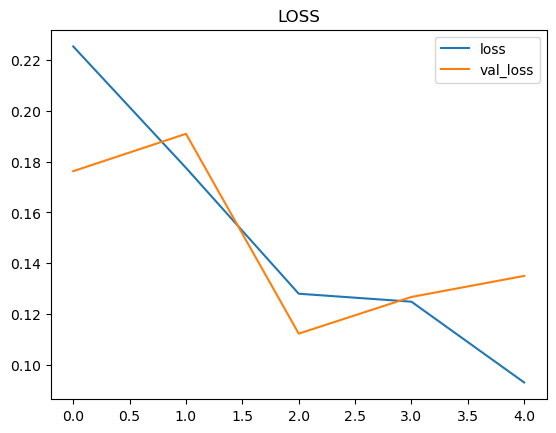

In [98]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title("LOSS")
plt.legend();

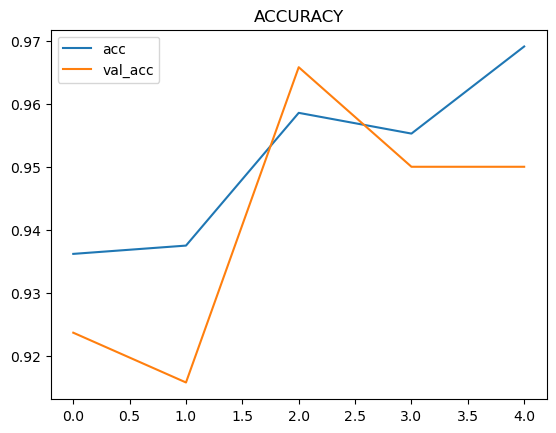

In [99]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.title("ACCURACY")
plt.legend();

## Classifying 10 images whether they are fire or no fire images and also plotted heatmap for each image with the IOU and dice coefficient metrics.

In [100]:
import os
test_path1=r"Forest Fire Dataset\Testing\fire"
files1=os.listdir(test_path1)
files1

['fire_0002.jpg',
 'fire_0015.jpg',
 'fire_0027.jpg',
 'fire_0038.jpg',
 'fire_0040.jpg',
 'fire_0048.jpg',
 'fire_0063.jpg',
 'fire_0072.jpg',
 'fire_0084.jpg',
 'fire_0091.jpg',
 'fire_0097.jpg',
 'fire_0107.jpg',
 'fire_0124.jpg',
 'fire_0139.jpg',
 'fire_0143.jpg',
 'fire_0145.jpg',
 'fire_0153.jpg',
 'fire_0158.jpg',
 'fire_0169.jpg',
 'fire_0174.jpg',
 'fire_0179.jpg',
 'fire_0188.jpg',
 'fire_0198.jpg',
 'fire_0205.jpg',
 'fire_0211.jpg',
 'fire_0217.jpg',
 'fire_0224.jpg',
 'fire_0229.jpg',
 'fire_0234.jpg',
 'fire_0239.jpg',
 'fire_0247.jpg',
 'fire_0253.jpg',
 'fire_0258.jpg',
 'fire_0271.jpg',
 'fire_0275.jpg',
 'fire_0277.jpg',
 'fire_0280.jpg',
 'fire_0289.jpg',
 'fire_0297.jpg',
 'fire_0300.jpg',
 'fire_0305.jpg',
 'fire_0314.jpg',
 'fire_0325.jpg',
 'fire_0329.jpg',
 'fire_0335.jpg',
 'fire_0340.jpg',
 'fire_0344.jpg',
 'fire_0348.jpg',
 'fire_0352.jpg',
 'fire_0355.jpg',
 'fire_0358.jpg',
 'fire_0367.jpg',
 'fire_0371.jpg',
 'fire_0379.jpg',
 'fire_0383.jpg',
 'fire_039

In [101]:
test_path2=r"Forest Fire Dataset\Testing\nofire"
files2=os.listdir(test_path2)
files2

['nofire_0006.jpg',
 'nofire_0010.jpg',
 'nofire_0012.jpg',
 'nofire_0032.jpg',
 'nofire_0039.jpg',
 'nofire_0051.jpg',
 'nofire_0059.jpg',
 'nofire_0076.jpg',
 'nofire_0081.jpg',
 'nofire_0084.jpg',
 'nofire_0090.jpg',
 'nofire_0094.jpg',
 'nofire_0097.jpg',
 'nofire_0098.jpg',
 'nofire_0103.jpg',
 'nofire_0112.jpg',
 'nofire_0115.jpg',
 'nofire_0126.jpg',
 'nofire_0128.jpg',
 'nofire_0132.jpg',
 'nofire_0140.jpg',
 'nofire_0147.jpg',
 'nofire_0152.jpg',
 'nofire_0158.jpg',
 'nofire_0160.jpg',
 'nofire_0167.jpg',
 'nofire_0172.jpg',
 'nofire_0174.jpg',
 'nofire_0180.jpg',
 'nofire_0184.jpg',
 'nofire_0192.jpg',
 'nofire_0196.jpg',
 'nofire_0202.jpg',
 'nofire_0206.jpg',
 'nofire_0212.jpg',
 'nofire_0219.jpg',
 'nofire_0225.jpg',
 'nofire_0230.jpg',
 'nofire_0237.jpg',
 'nofire_0241.jpg',
 'nofire_0246.jpg',
 'nofire_0252.jpg',
 'nofire_0256.jpg',
 'nofire_0259.jpg',
 'nofire_0267.jpg',
 'nofire_0270.jpg',
 'nofire_0273.jpg',
 'nofire_0275.jpg',
 'nofire_0278.jpg',
 'nofire_0281.jpg',


In [102]:
# Combine files1 and files2 to test images
images=files1+files2
import random
test_images = random.sample( images, len(images) )
test_images[:5]

['nofire_0813.jpg',
 'nofire_0132.jpg',
 'nofire_0608.jpg',
 'nofire_0574.jpg',
 'nofire_0184.jpg']

In [294]:
def ObjectDetection(path):
    img=cv2.imread(path)
    
    # obtained a binary image after performing binary threshold on the a-channel of the LAB converted image
    lab=cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
    a_component=lab[:,:,1]
    threshold=cv2.threshold(a_component,140,255,cv2.THRESH_BINARY)[1]
    
    #Applying Gaussian Blur filter
    blur = cv2.GaussianBlur(threshold,(13,13), 11)

    #Applying heatmap on blur image.
    heatmap_img = cv2.applyColorMap(blur,cv2.COLORMAP_JET)

    #Superimposing heatmap on the original image.
    superimposed_heatmap=cv2.addWeighted(heatmap_img,0.5,img,0.5,0)
    return superimposed_heatmap
    


In [295]:
def manual_annotation(original_image):
    
    # Manually annotate ground truth labels (for demonstration purposes, you can replace this with your actual ground truth labels)
    ground_truth_labels = np.zeros(original_image.shape[:2], dtype=np.uint8)
    ground_truth_labels[100:200, 100:200] = 1  # Example: Assign label 1 to a region
    
    return ground_truth_labels
def calculate_iou(gt_labels, pred_labels):
    intersection = np.logical_and(gt_labels, pred_labels)
    union = np.logical_or(gt_labels, pred_labels)
    iou = np.sum(intersection) / np.sum(union)
    return iou

def calculate_dice_coefficient(gt_labels, pred_labels):
    intersection = np.logical_and(gt_labels, pred_labels)
    dice_coefficient = 2 * np.sum(intersection) / (np.sum(gt_labels) + np.sum(pred_labels))
    return dice_coefficient


In [296]:
#Take images from DB and check results on it.
import cv2
import seaborn as sns


def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    superimposed_image=ObjectDetection(filename)
   
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(6,6))
    ax1.imshow(img)
    ax2.imshow(superimposed_image)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    
    val = model.predict(X)
    ax1.set_title("Original Image")
    ax2.set_title("Superimposed Heatmap")
    if(val == 1):
        ax1.set_xlabel("No Fire",fontsize=30)
    elif(val==0):
        ax1.set_xlabel("Fire",fontsize=30)
    plt.show()
    
    # Extract the heatmap region by masking out the non-heatmap pixels
    heatmap_region = superimposed_image.copy()
    heatmap_region[heatmap_region < 128] = 0  # Threshold to extract heatmap pixels

    # Convert the heatmap region to binary image
    heatmap_region_binary = cv2.cvtColor(heatmap_region, cv2.COLOR_BGR2GRAY)
    heatmap_region_binary = np.where(heatmap_region_binary > 0, 1, 0)
    # Extract ground truth labels (e.g., using annotations or thresholding)
    ground_truth_labels = manual_annotation(superimposed_image)
    # Binarize the ground truth labels for the heatmap region
    ground_truth_labels_binary = np.where(ground_truth_labels > 0, 1, 0)
   
    # Calculate IoU and Dice Coefficient for the heatmap region
    iou = calculate_iou(ground_truth_labels_binary, heatmap_region_binary)
    dice_coefficient = calculate_dice_coefficient(ground_truth_labels_binary, heatmap_region_binary)

    print(f"IoU for heatmap region: {iou}")
    print(f"Dice Coefficient for heatmap region: {dice_coefficient}")

   
    

    

In [297]:
import re
path=[]
#path=os.path.join("Forest Fire Dataset\Training",test_images)
for p in test_images:
    p_img=p.split('_')
    if "fire" in p_img:
        path.append(os.path.join(r"Forest Fire Dataset\Testing","fire",p))
    else:
        path.append(os.path.join(r"Forest Fire Dataset\Testing\nofire",p))
path[:10]   

['Forest Fire Dataset\\Testing\\nofire\\nofire_0813.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0132.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0608.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0574.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0184.jpg',
 'Forest Fire Dataset\\Testing\\fire\\fire_0490.jpg',
 'Forest Fire Dataset\\Testing\\fire\\fire_0253.jpg',
 'Forest Fire Dataset\\Testing\\fire\\fire_0300.jpg',
 'Forest Fire Dataset\\Testing\\fire\\fire_0516.jpg',
 'Forest Fire Dataset\\Testing\\nofire\\nofire_0174.jpg']

1/1 [==============================] - 0s 78ms/step


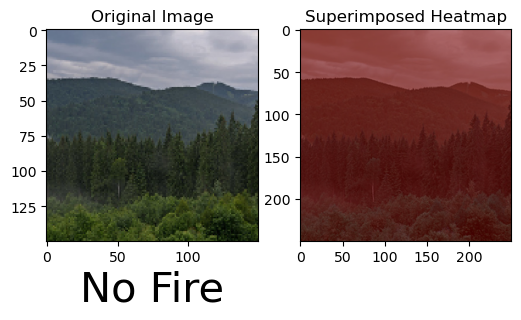

IoU for heatmap region: 0.0
Dice Coefficient for heatmap region: 0.0
1/1 [==============================] - 0s 219ms/step


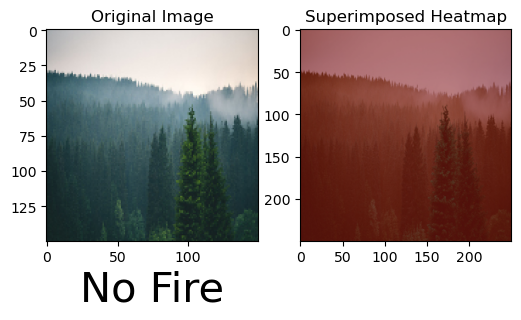

IoU for heatmap region: 0.03819225337299799
Dice Coefficient for heatmap region: 0.07357452966714906
1/1 [==============================] - 0s 78ms/step


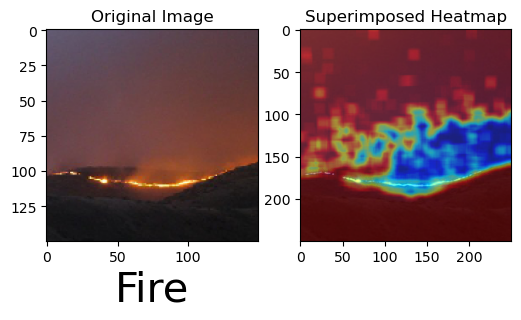

IoU for heatmap region: 0.37198402347570914
Dice Coefficient for heatmap region: 0.5422570775034905
1/1 [==============================] - 0s 78ms/step


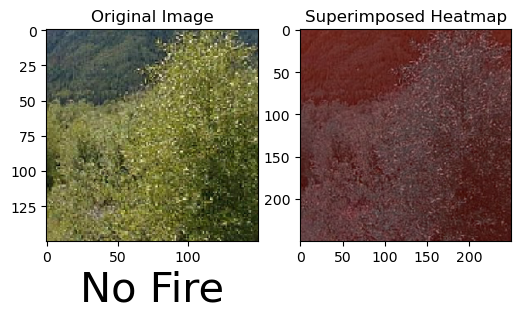

IoU for heatmap region: 0.01925488088841125
Dice Coefficient for heatmap region: 0.03778226869343643
1/1 [==============================] - 0s 78ms/step


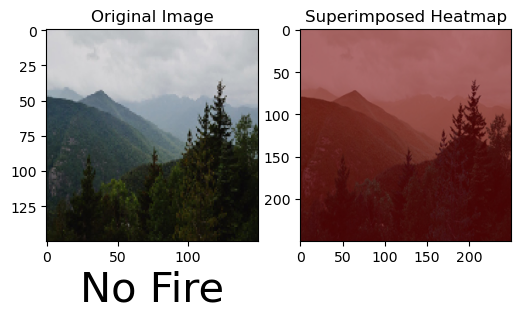

IoU for heatmap region: 0.058037961564656064
Dice Coefficient for heatmap region: 0.10970865634882875
1/1 [==============================] - 0s 78ms/step


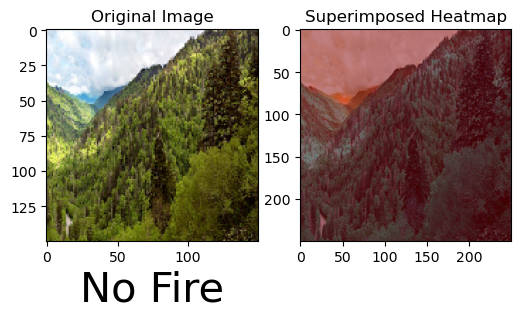

IoU for heatmap region: 0.0
Dice Coefficient for heatmap region: 0.0
1/1 [==============================] - 0s 94ms/step


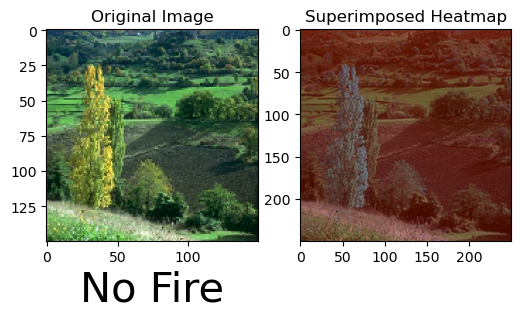

IoU for heatmap region: 0.0053564692568841945
Dice Coefficient for heatmap region: 0.010655860723397869
1/1 [==============================] - 0s 62ms/step


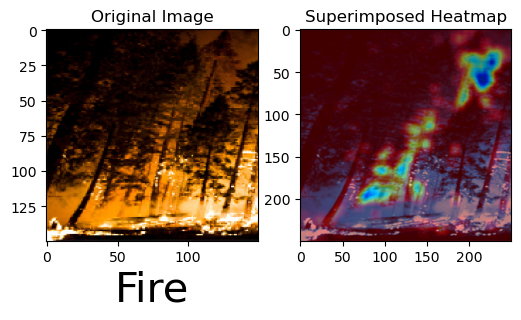

IoU for heatmap region: 0.195421831267493
Dice Coefficient for heatmap region: 0.32695041391420687
1/1 [==============================] - 0s 78ms/step


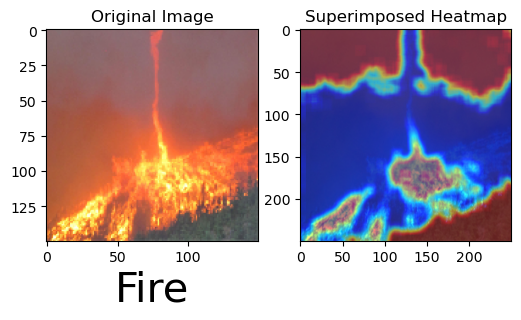

IoU for heatmap region: 0.19421563995645297
Dice Coefficient for heatmap region: 0.3252605868794936
1/1 [==============================] - 0s 78ms/step


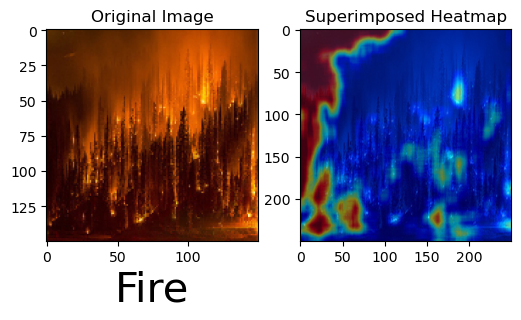

IoU for heatmap region: 0.17374202904308786
Dice Coefficient for heatmap region: 0.29604806634509606


In [298]:
import numpy as np
img_path=r""
for i in range(10,20):
    img_path=path[i]
    predictImage(img_path)

## Confusion matrix and Classification report

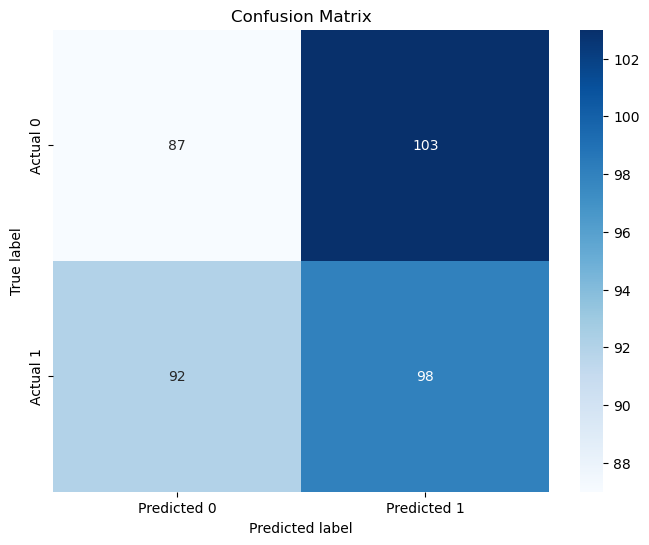

Accuracy: 0.4868421052631579
Precision: 0.48756218905472637
Recall: 0.5157894736842106
F1 Score: 0.5012787723785166


In [299]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred=predictions
# Extract true labels from the test dataset generator
y_true = test_dataset.classes

# Convert the predictions to binary format (e.g., using a threshold)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)